In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.decomposition import PCA


In [3]:
X, _ = make_blobs(n_samples= 300, centers= 3, random_state= 2024)
df_raw = pd.DataFrame(X, columns= ['x','y'])
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       300 non-null    float64
 1   y       300 non-null    float64
dtypes: float64(2)
memory usage: 4.8 KB


In [4]:
df = df_raw.copy()
df.describe().T

,count,mean,std,min,25%,50%,75%,max
x,300.0,-3.463733,3.842370,-9.657696,-6.402874,-5.367757,1.060328,3.575209
y,300.0,-4.341295,6.108935,-12.454461,-9.120832,-7.524914,3.539383,6.681679


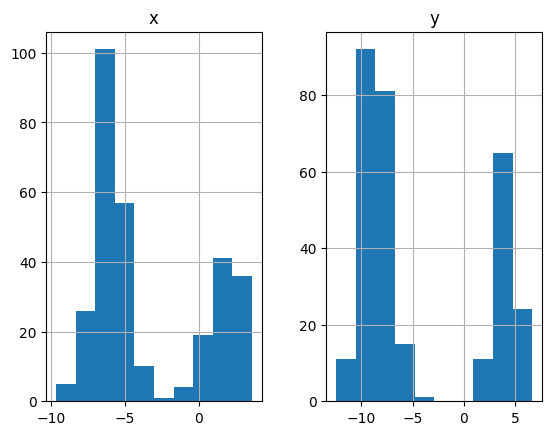

In [5]:
df.hist()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

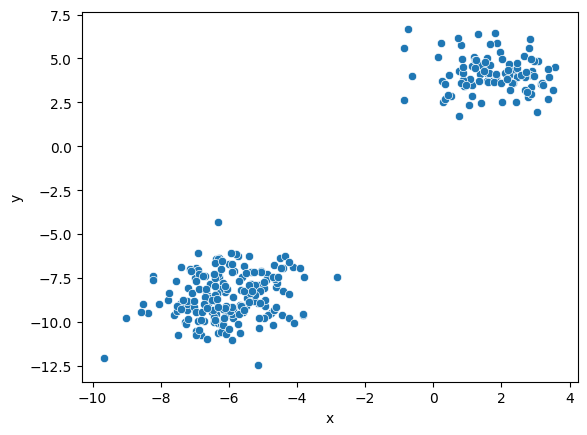

In [6]:
#Scatter plot
sns.scatterplot(data=df, x='x', y='y')
plt.show

In [7]:
escaler = StandardScaler()
X_escaled = escaler.fit_transform(df)
X_escaled

array([[-0.90897378, -0.42813105],
       [ 1.26384366,  1.38917041],
       [-0.30362524, -0.60421383],
       [ 1.20027255,  1.28204937],
       [-0.42914431, -0.58324088],
       [-0.64793586, -0.80794932],
       [ 1.18327882,  1.34418286],
       [-1.04682949, -1.04921327],
       [ 1.37562047,  1.76812319],
       [-0.59076986, -0.31057767],
       [-0.83478218, -0.63777185],
       [-0.73339313, -0.50810307],
       [-0.55588361, -0.83782539],
       [-1.19523997, -0.7655939 ],
       [ 1.42993717,  1.12114908],
       [ 1.72667551,  1.29141987],
       [-0.24582149, -0.64331786],
       [-0.71376044, -1.00523049],
       [-0.76536807, -0.81469002],
       [ 1.82174491,  1.23887884],
       [-0.85465568, -0.92457984],
       [ 0.97065329,  1.31922841],
       [-0.65581747, -0.86862245],
       [-0.57944433, -0.77214005],
       [ 1.4161385 ,  1.59576965],
       [-0.62894314, -0.89331498],
       [-0.62433811, -0.45541574],
       [-1.07878155, -0.86286611],
       [ 1.51571522,

In [8]:
df_escaled = pd.DataFrame(X_escaled, columns=["X_Escaled", "Y_Escaled"])
df_escaled.describe().T

,count,mean,std,min,25%,50%,75%,max
X_Escaled,300.0,-8.289665e-17,1.001671,-1.614710,-0.766207,-0.496362,1.179381,1.834988
Y_Escaled,300.0,-4.144833e-17,1.001671,-1.330301,-0.783692,-0.522012,1.292180,1.807417


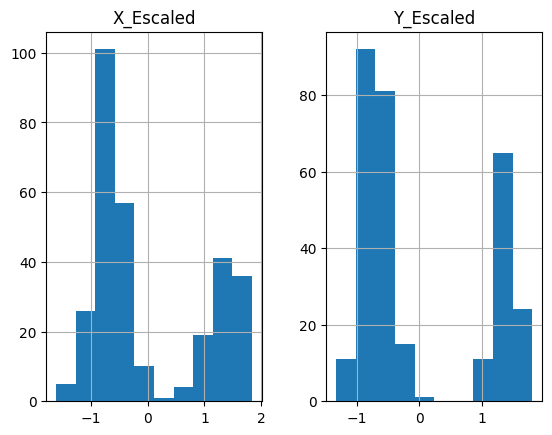

In [9]:
df_escaled.hist()
plt.show()

In [10]:
# El dos es por lo que observo
model = KMeans(n_clusters=4, random_state=2024)
model.fit(X_escaled)

KMeans(n_clusters=4, random_state=2024)

In [11]:
# prediccion
cluster = model.predict(X_escaled)
cluster

array([2, 1, 0, 1, 0, 3, 1, 3, 1, 2, 2, 2, 0, 3, 1, 1, 0, 3, 3, 1, 3, 1,
       3, 0, 1, 3, 2, 3, 1, 0, 1, 1, 1, 3, 3, 1, 3, 3, 1, 2, 0, 0, 1, 2,
       0, 3, 1, 3, 1, 3, 2, 2, 3, 3, 3, 2, 1, 2, 3, 0, 2, 0, 3, 3, 1, 3,
       2, 1, 3, 0, 1, 1, 3, 2, 0, 1, 3, 0, 1, 2, 2, 3, 2, 0, 0, 3, 1, 3,
       3, 3, 3, 3, 3, 0, 1, 3, 1, 2, 1, 1, 2, 1, 0, 0, 1, 1, 2, 3, 0, 1,
       1, 3, 2, 0, 0, 1, 1, 3, 0, 0, 1, 3, 2, 1, 3, 0, 2, 0, 2, 0, 3, 3,
       0, 1, 0, 1, 0, 1, 0, 3, 1, 2, 0, 0, 0, 2, 0, 1, 0, 3, 1, 1, 1, 1,
       1, 3, 0, 3, 3, 0, 1, 1, 3, 1, 3, 3, 1, 1, 3, 2, 1, 2, 0, 2, 0, 0,
       2, 1, 3, 2, 3, 2, 1, 1, 2, 2, 3, 1, 0, 0, 3, 1, 0, 2, 0, 0, 3, 2,
       1, 3, 0, 1, 2, 2, 1, 0, 1, 1, 3, 1, 1, 3, 0, 2, 1, 3, 3, 1, 3, 1,
       1, 1, 1, 1, 0, 2, 1, 1, 2, 1, 0, 0, 2, 1, 2, 0, 0, 3, 3, 2, 1, 0,
       0, 3, 2, 3, 0, 3, 1, 1, 2, 1, 2, 3, 2, 1, 1, 0, 1, 2, 0, 0, 3, 0,
       1, 1, 1, 0, 1, 0, 1, 3, 3, 1, 3, 3, 1, 1, 3, 3, 2, 2, 1, 1, 1, 1,
       3, 2, 3, 3, 0, 0, 3, 2, 1, 1, 3, 1, 2, 3], d

In [12]:
df_final = df_escaled.copy()

df_final["cluster"] = cluster


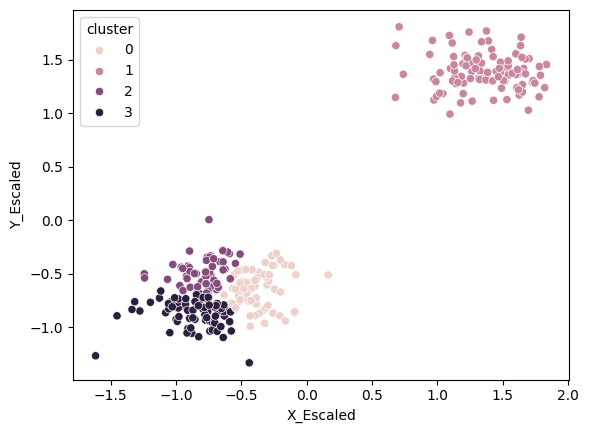

In [13]:
sns.scatterplot(data=df_final, x='X_Escaled', y= 'Y_Escaled', hue='cluster')
plt.show()

In [14]:
X, _ = load_iris(return_X_y=True, as_frame=True)
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [15]:
X.columns = X.columns.str.replace(" ", "").str.replace(r"\W","",regex=True)
X

,sepallengthcm,sepalwidthcm,petallengthcm,petalwidthcm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


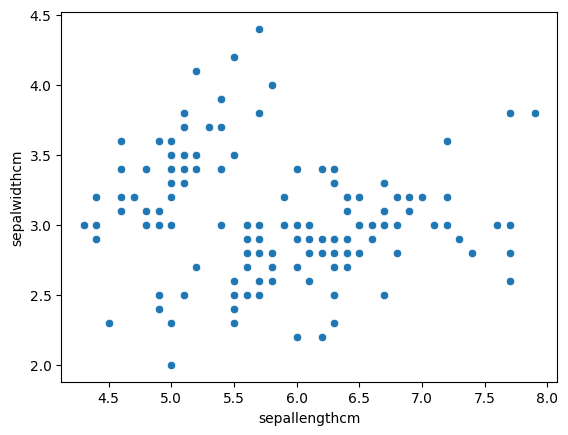

In [16]:
sns.scatterplot(data=X, x="sepallengthcm", y="sepalwidthcm")
plt.show()

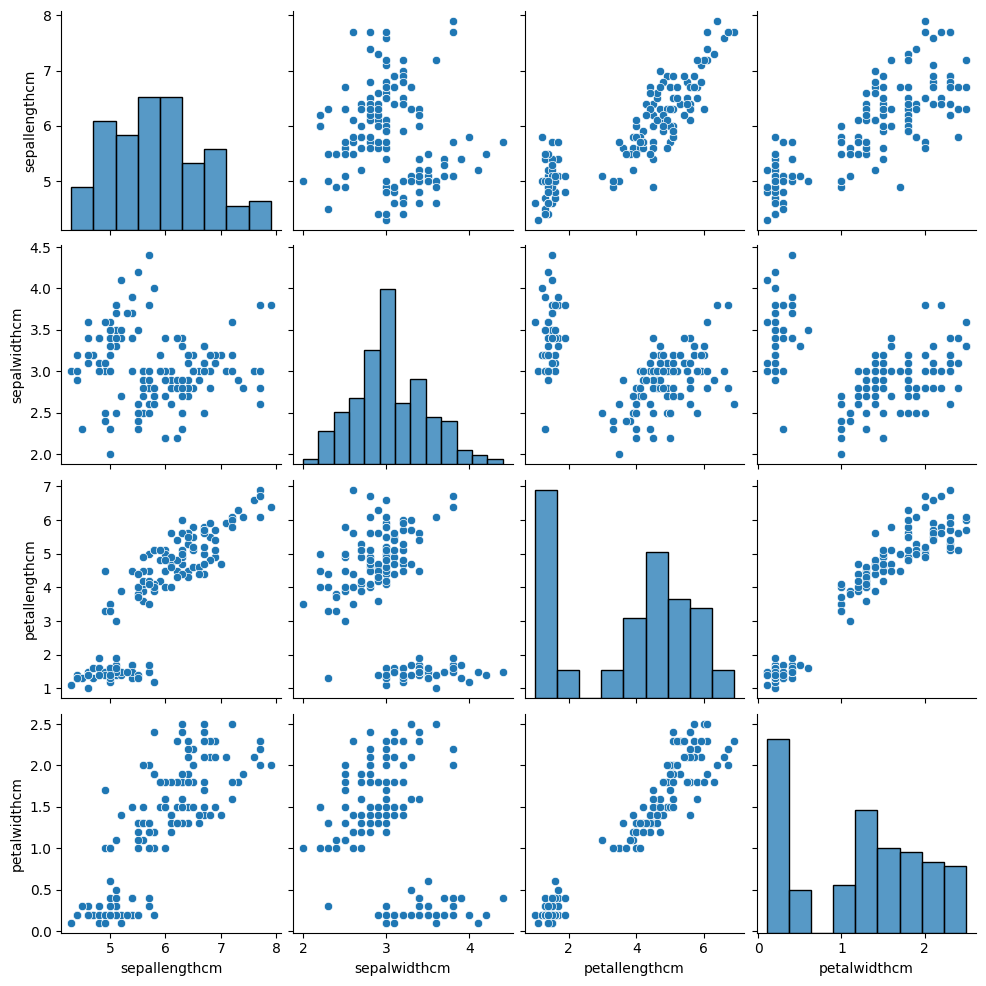

In [17]:
sns.pairplot(data=X)
plt.show()

In [18]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
df_scaled = pd.DataFrame(X_scaled, columns=["sepallengthcm2", "sepalwidthcm",	"petallengthcm",	"petalwidthcm"])
df_scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
sepallengthcm2,150.0,-4.736952e-16,1.00335,-1.870024,-0.900681,-0.052506,0.674501,2.492019
sepalwidthcm,150.0,-7.815970e-16,1.00335,-2.433947,-0.592373,-0.131979,0.558611,3.090775
petallengthcm,150.0,-4.263256e-16,1.00335,-1.567576,-1.226552,0.336478,0.762758,1.785832
petalwidthcm,150.0,-4.736952e-16,1.00335,-1.447076,-1.183812,0.132510,0.790671,1.712096


In [19]:
Z = linkage(df_escaled, method="complete")
Z


array([[2.93000000e+02, 2.98000000e+02, 1.30032711e-03, 2.00000000e+00],
       [7.20000000e+01, 2.75000000e+02, 3.59183444e-03, 2.00000000e+00],
       [1.29000000e+02, 1.74000000e+02, 5.87893301e-03, 2.00000000e+00],
       ...,
       [5.87000000e+02, 5.93000000e+02, 1.25865928e+00, 1.00000000e+02],
       [5.94000000e+02, 5.95000000e+02, 1.93318262e+00, 2.00000000e+02],
       [5.96000000e+02, 5.97000000e+02, 4.41006244e+00, 3.00000000e+02]])

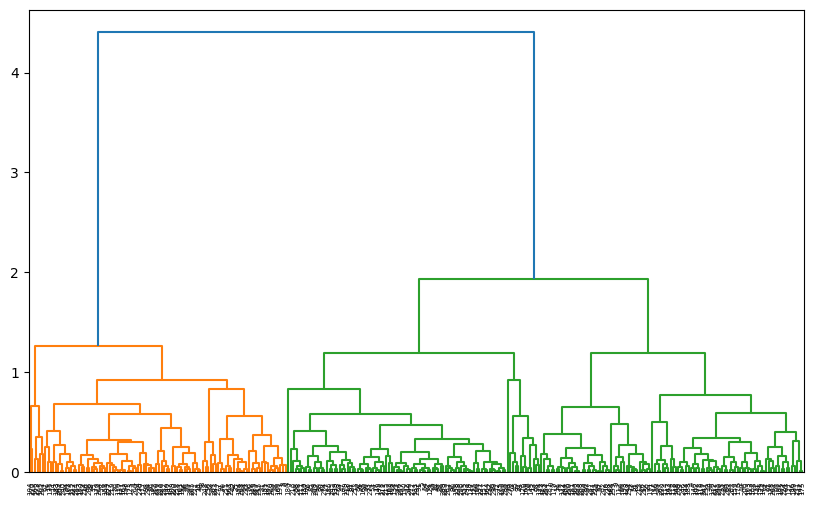

In [20]:
plt.figure(figsize=(10,6))
dendrogram(Z)
plt.show()

In [21]:
X

,sepallengthcm,sepalwidthcm,petallengthcm,petalwidthcm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [22]:
X.corr()

,sepallengthcm,sepalwidthcm,petallengthcm,petalwidthcm
sepallengthcm,1.000000,-0.117570,0.871754,0.817941
sepalwidthcm,-0.117570,1.000000,-0.428440,-0.366126
petallengthcm,0.871754,-0.428440,1.000000,0.962865
petalwidthcm,0.817941,-0.366126,0.962865,1.000000


In [27]:
# puedo combinar las variables que están altamente relacionadas
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

In [28]:
df_pca = pd.DataFrame(data=X_pca, columns= ["PC1", "PC2"])
df_pca

,PC1,PC2
0,-2.684126,0.319397
1,-2.714142,-0.177001
2,-2.888991,-0.144949
3,-2.745343,-0.318299
4,-2.728717,0.326755
...,...,...
145,1.944110,0.187532
146,1.527167,-0.375317
147,1.764346,0.078859
148,1.900942,0.116628


In [29]:
sns.scatterplot(data=df_pca, x="PC1", y="PC2)
plt.show()

SyntaxError: unterminated string literal (detected at line 1) (2437657192.py, line 1)

In [ ]:

pca.explained_variance_ratio_